# Diamond Dataset
### a dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds.
We'll go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, you'll work on polishing up selected plots from the analysis so that their main points can be clearly conveyed to others.

The dataset consists of almost 54,000 rows and 10 columns. For the case study, we will concentrate only the variables in the **top five bullet points**: `price` and the **four** `C`s of diamond grade. Our focus will be on answering the question about the degree of **importance** that each of these quality measures has on the **pricing of a diamond**. Columns Are:

- **price**: Price in dollars. Data was collected in 2008.
- **carat**: Diamond weight. 1 carat is equal to 0.2 grams.
- **cut**: Quality of diamond cut, affects **its shine**. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- **color**: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- **clarity**: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- **x, y, z**: Diamond length, width, and depth, respectively, **in mm**.
- **table**: Ratio of width of top face of diamond to its overall width, **as a percentage**.
- **depth**: Proportional depth of diamond, **as a percentage**. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

# Dataset Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Univariate Exploration
Let's start our exploration by looking at the main variable of interest: `price` <br>Is the distribution skewed or symmetric? Is it unimodal or multimodal?

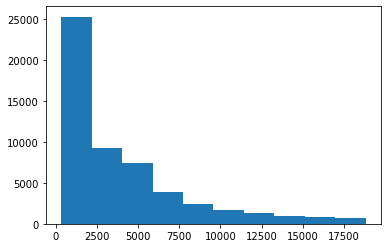

In [5]:
plt.hist(diamonds['price']);

The diamond price follows a highly skewed distribution.

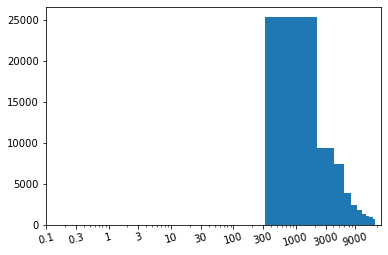

In [6]:
plt.hist(diamonds['price'])
plt.xscale('log');
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000,9000]
plt.xticks( x_ticks,x_ticks);
plt.xticks(rotation=15);

the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

Next, I will create a plot of our first diamond 'C' metric: `carat` weight. <br>To see if there is an interesting pattern in these values?

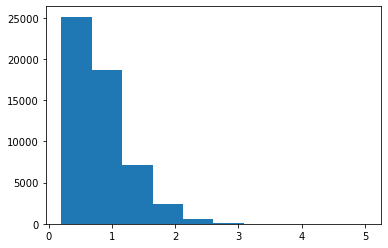

In [7]:
plt.hist(diamonds['carat']);

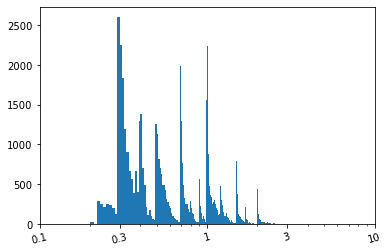

In [8]:
bins = np.arange(0.2,5+0.2,0.01)
plt.hist(diamonds['carat'],bins=bins);
plt.xscale('log');
x_ticks = [0.1, 0.3, 1, 3, 10]
plt.xticks( x_ticks,x_ticks);
plt.xticks(rotation=15);

An interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. Perhaps these spikes come about as part of standard diamond size conventions?

Now, let's move on to exploring the other three 'C' quality measures: `cut`, `color`, and `clarity`. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

Since these features are **categorical**, we should be producing `bar charts` here. In addition, since they're **ordinal** in nature, the bars should be sorted in order of increasing quality level.

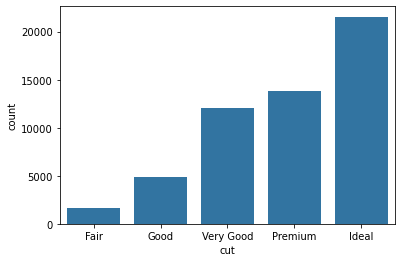

In [9]:
base_color = sb.color_palette()[0]
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sb.countplot(data=diamonds, x='cut', color=base_color,order=cut_cats);

The mode cut quality for diamonds in this dataset is the highest grade, `Ideal`. There is a consistent decrease in number of diamonds of lower cut grades.

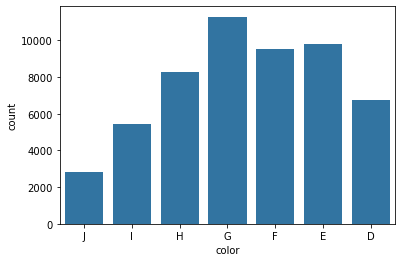

In [10]:
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D' ]
sb.countplot(data=diamonds, x='color', color=base_color,order=color_cats);

The distribution is roughly **unimodal**, with the most common color grade in this dataset belonging to the central grade represented, `G`. (There are other diamond grades that are worse than `J`, but they're not part of the collected data.)

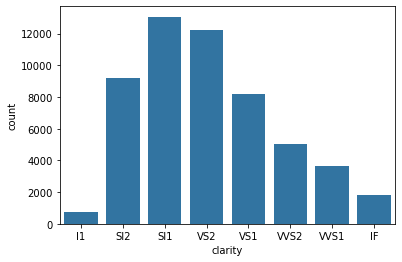

In [11]:
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sb.countplot(data=diamonds, x='clarity', color=base_color,order=clarity_cats);

There is a **right-skew** in the `clarity` grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions `SI2`, `SI1`, `VS2`, and `VS1`. There are very few diamonds with visible inclusions `I1`.

### convert `cut`, `color`, and `clarity` into ordered categorical types

In [12]:
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

In [13]:
for var in ordinal_var_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)

# Bivariate Exploration

Now, we'll investigate relationships between pairs of previous variables, particularly how each of them relate to diamond `price`.

To start, I will construct a plot of the `price` against `carat` weight.

What kind of shape does the relationship between these variables take?

### Carat VS Price

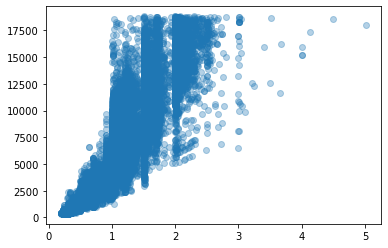

In [14]:
plt.scatter(data=diamonds, x='carat',y='price',alpha=1/3);

Since `price` distribution suggests a logarithmic transformation due to its very long tail. Will do that before.

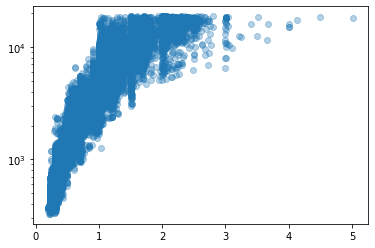

In [15]:
plt.scatter(data=diamonds, x='carat',y='price',alpha=1/3);
plt.yscale('log');

The transformation have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It  is nice to have a linear trend, wouldn't it? 

It turns out that the x, y, and z dimensions track a much more linear trend against `price` than `carat` does. Since `carat` is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), **a cube-root transformation of carat** should allow us to see an approximately linear trend.

In [16]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [17]:
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

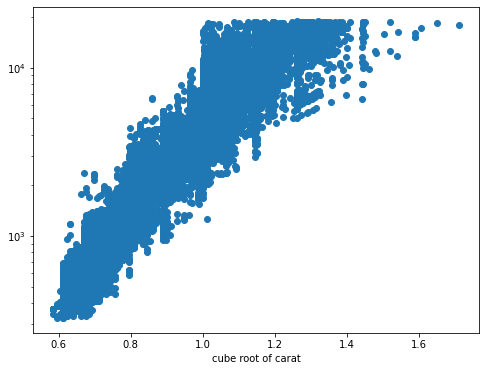

In [18]:
plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')
plt.xlabel('cube root of carat')
plt.yscale('log')
plt.show()

The trend between `pric`e and `carat` weight is 'cut off' by the maximum price limit of diamonds available in the dataset.

For diamonds above about **1.5 carats**, we'd probably expect some diamonds about **$20,000** in price, given the trend below **1.5 carats**.

This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

Now let's take a look at the relationship between `price` and the three categorical quality features, `cut`, `color`, and `clarity`. 

Are there any surprising trends to be seen here?

### Color VS Price

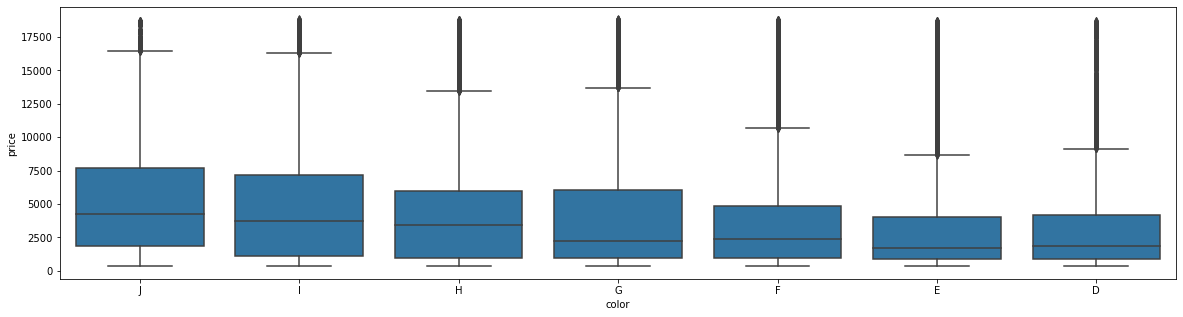

In [19]:
fig = plt.figure(figsize=(20,5))
sb.boxplot(data=diamonds, x='color', y='price',color=base_color);

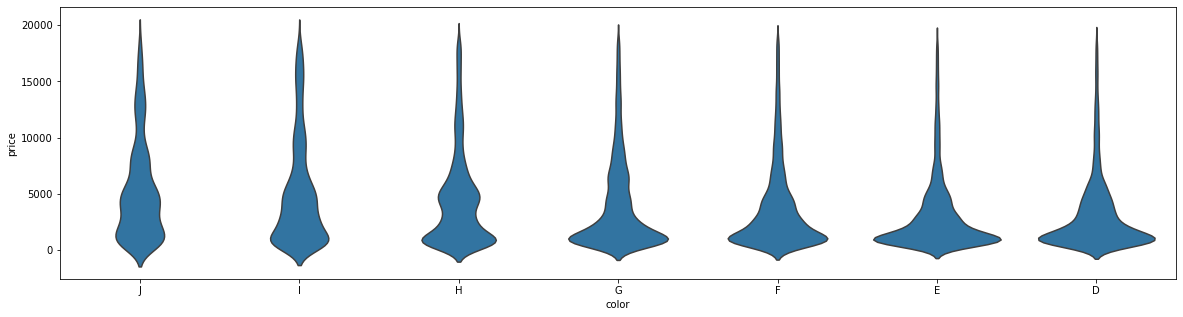

In [20]:
fig = plt.figure(figsize=(20,5))
sb.violinplot(data=diamonds, x='color', y='price',inner=None,color=base_color);

### Cut VS Price

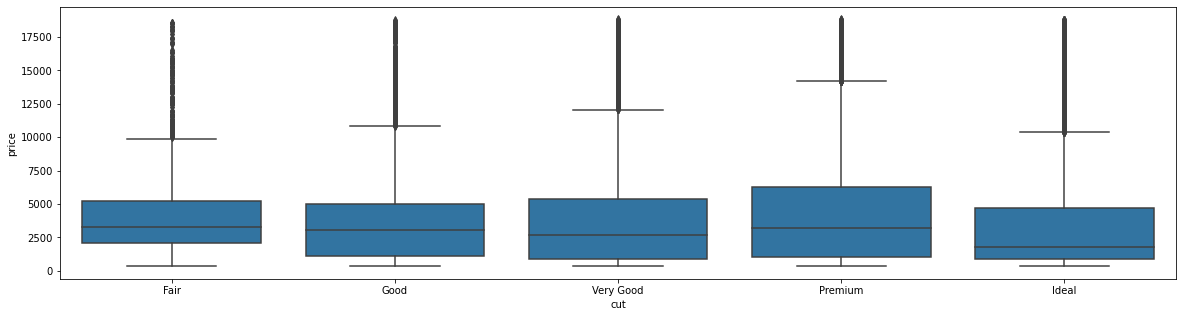

In [21]:
fig = plt.figure(figsize=(20,5))
sb.boxplot(data=diamonds, x='cut', y='price',color=base_color);

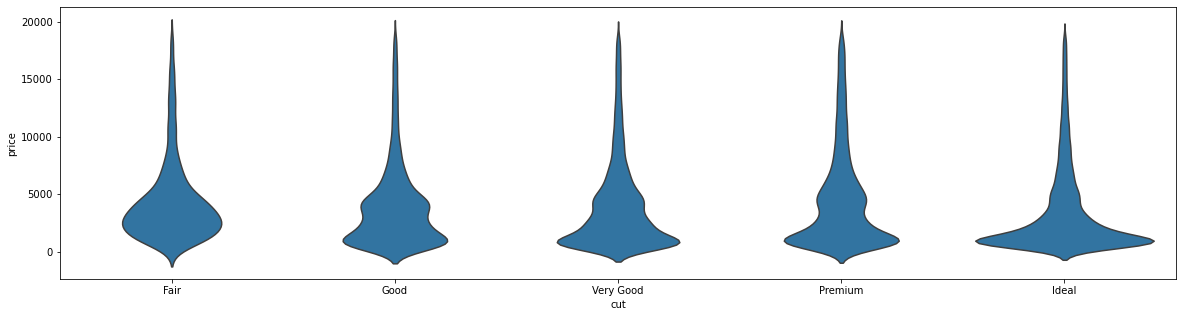

In [22]:
fig = plt.figure(figsize=(20,5))
sb.violinplot(data=diamonds, x='cut', y='price',inner=None,color=base_color);

### Clarity VS Price

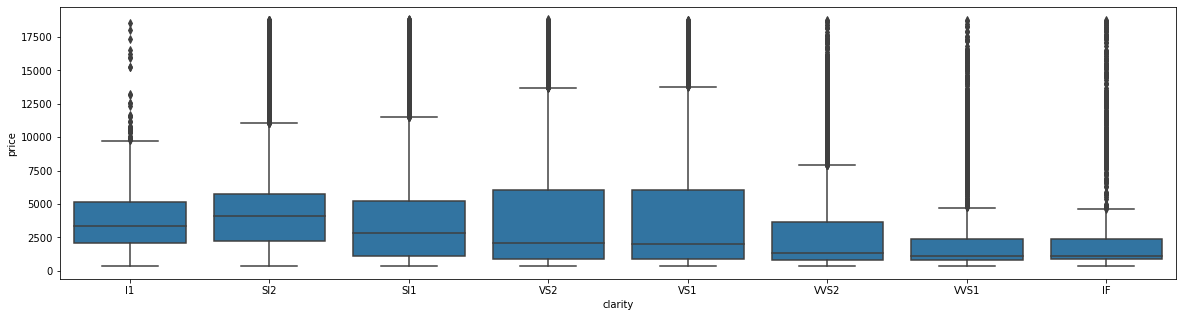

In [23]:
fig = plt.figure(figsize=(20,5))
sb.boxplot(data=diamonds, x='clarity', y='price',color=base_color);

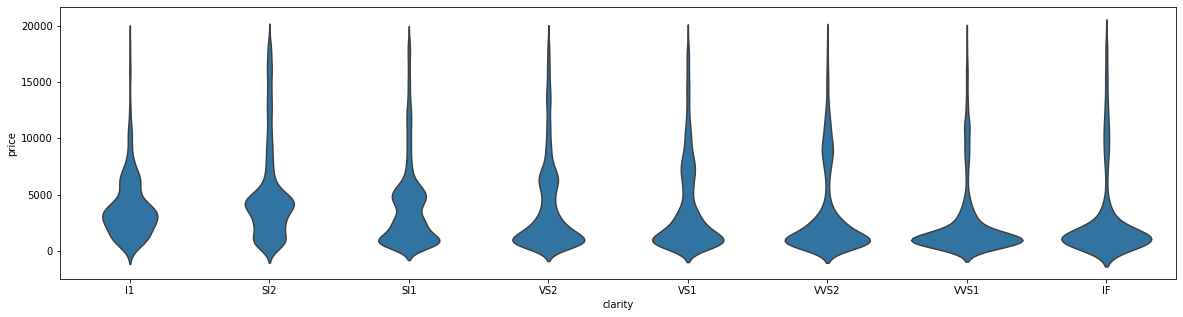

In [24]:
fig = plt.figure(figsize=(20,5))
sb.violinplot(data=diamonds, x='clarity', y='price',inner=None,color=base_color);

With `boxplot`, The median `price` of diamonds tend to look like it **decrease with increasing gem quality**.  Shouldn't we expect this to be the other way around? This deserves a deeper look. To shows more details in the data I've also used a `violin plot`, so I can get more insight into what causes the trend in median prices to appear as it does.

`Faceted histograms` will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. 

Going across increasing **quality levels**, we should see that the modes **rise in price** - this should be the expected effect of quality.

However, we should also see that more of the data will be located in the **lower-priced modes** - this explains the unintuitive result noted in the previous sections. This is clearest in the `clarity` variable. Let's keep searching the data to see if there's more we can say about this pattern.

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, **how does `carat` weight change across the other three 'C' quality measures?** We can take the same approach as the above investigation of price against the three categorical quality measures.

What can we see in these plots, and how does this relate to your earlier investigations?

### Carat VS Other 'C's

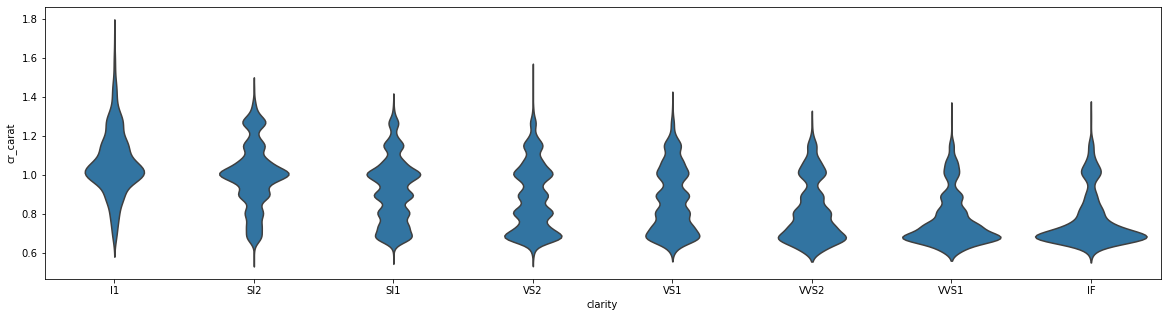

In [25]:
fig = plt.figure(figsize=(20,5))
sb.violinplot(data=diamonds, x='clarity', y='cr_carat',inner=None,color=base_color)

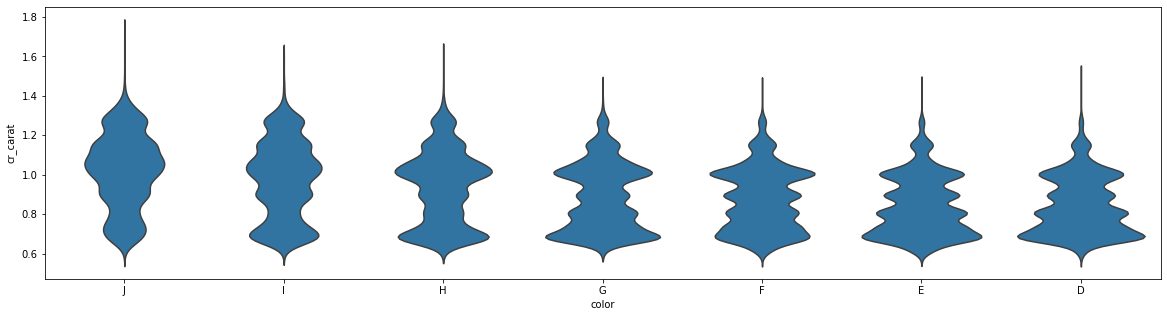

In [26]:
fig = plt.figure(figsize=(20,5))
sb.violinplot(data=diamonds, x='color', y='cr_carat',inner=None,color=base_color);

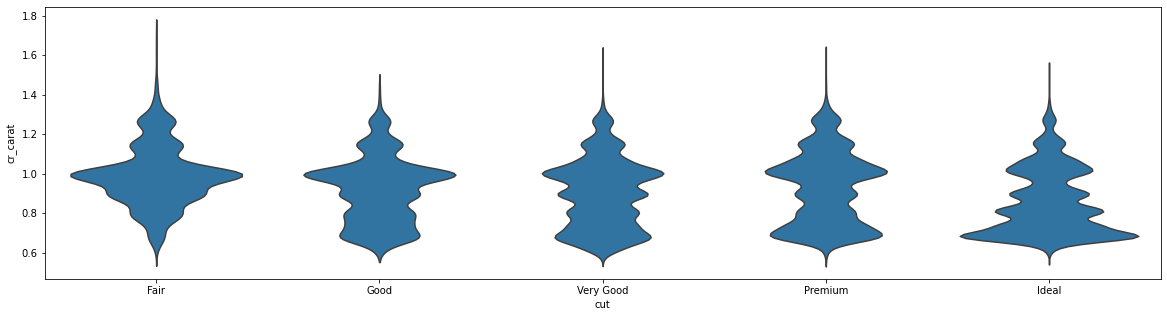

In [27]:
fig = plt.figure(figsize=(20,5))
sb.violinplot(data=diamonds, x='cut', y='cr_carat',inner=None,color=base_color);

These plots shed a lot more light into the patterns already seen.

**Larger diamonds** are more likely to receive **lower** categorical **quality** grades, while **high quality** grades are more likely to have their numbers made up of **smaller diamonds**.

Since `carat` weight appears to be a major driver of `price`, this helps to explain the surprising marginal effect of diamond quality against price.

The challenge next will be on how to depict this in a **multivariate plot**.

# Multivariate Exploration
We saw that the log of `price` was approximately linearly related to the cube root of `carat` weight, as analogy to its length, width, and depth. Also, we saw that `carat` size tending to be smaller for the diamonds with higher categorical grades. 

Now, we will depict these interaction effects through the use of **multivariate plots**.

We saw that `clarity` had the clearest interactions with `price` and `carat`.

I will create a plot of the relationship between `price`, `carat`, and `clarity`. To see how clearly does this show up in a multivariate visualization?

## Price VS Carat VS Clarity

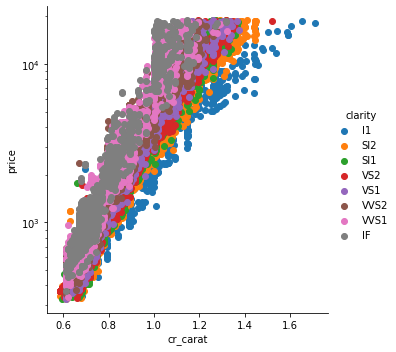

In [28]:
g = sb.FacetGrid(data = diamonds, hue = 'clarity', height = 5) 
g.map(plt.scatter, 'cr_carat', 'price')
g.add_legend();
plt.yscale('log')

Since the sheer number of points causes overplotting, I suggest a different plot type. A `faceted scatterplot` or `heat map` is a better choice in this case.

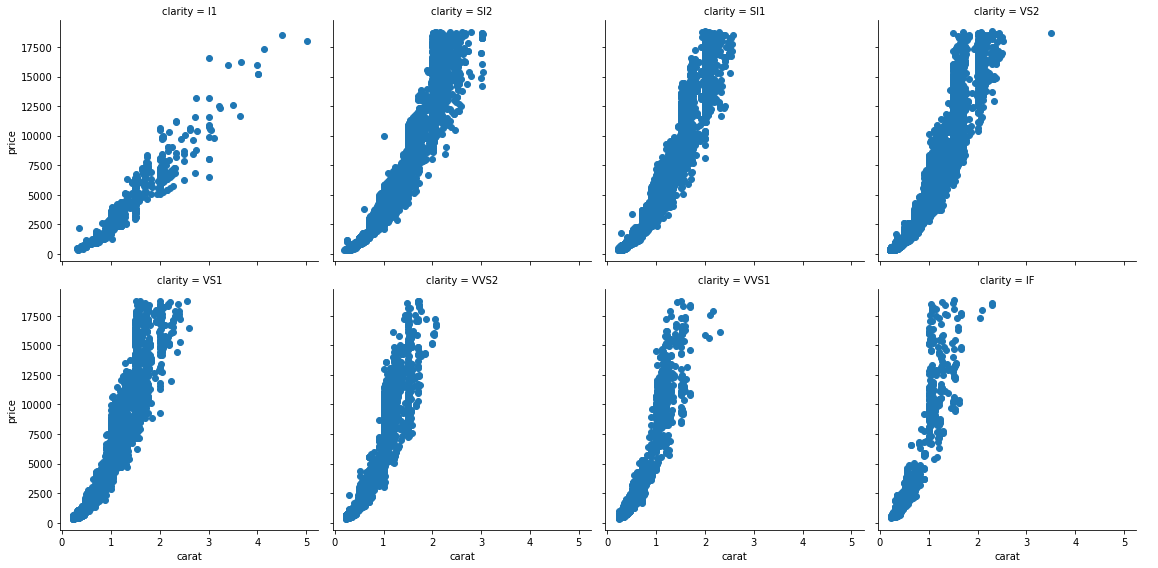

In [29]:
g = sb.FacetGrid(data = diamonds, col = 'clarity', height = 4,col_wrap=4)
g.map(plt.scatter, 'carat', 'price')
g.add_legend();

Lets apply transformation functions to the `price` and `carat` values?

The general movement of the points **upwards and to the left**, corresponding with **smaller diamond sizes**, but **higher value** for **their sizes**.

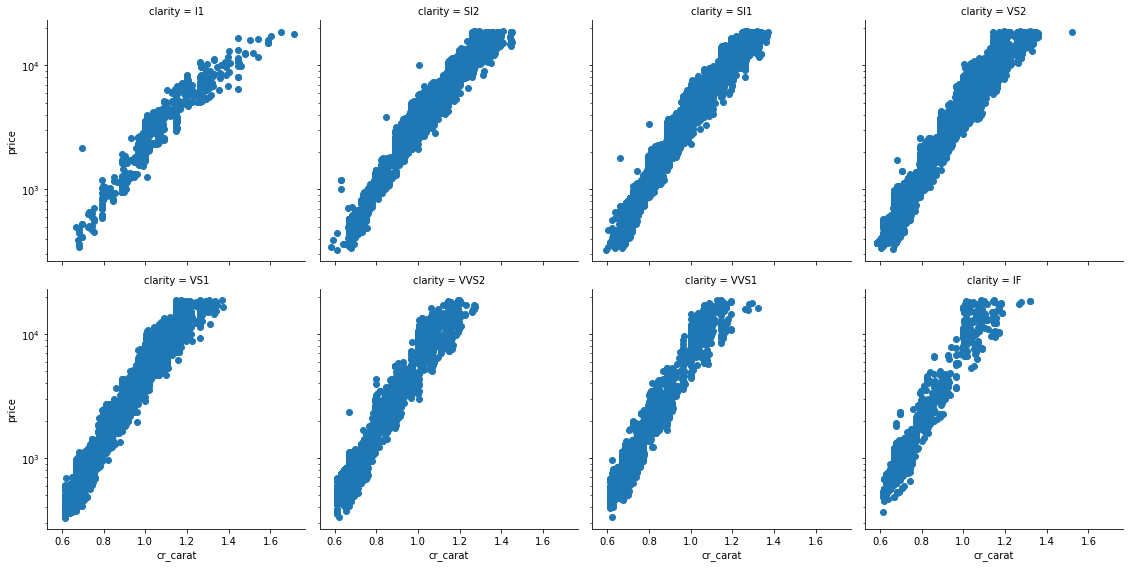

In [30]:
g = sb.FacetGrid(data = diamonds, col = 'clarity', height = 4,col_wrap=4)
g.map(plt.scatter, 'cr_carat', 'price')
g.add_legend();
plt.yscale('log');

Let's try a different plot, for diamond `price` against `cut` and `color` quality features. 

To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a **small range of diamond weights**.

For this plot, I will select diamonds in a small range **around 1 `carat` weight**. 

I will try to make it so that the plot shows the effect of each of these categorical variables on the `price` of diamonds.

## Price VS Cut VS Color

In [31]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
df = diamonds.loc[diamond_flag,:]

In [32]:
df['cr_carat'].describe()

count    5229.000000
mean        1.003518
std         0.003101
min         0.996655
25%         1.000000
50%         1.003322
75%         1.006623
max         1.009902
Name: cr_carat, dtype: float64

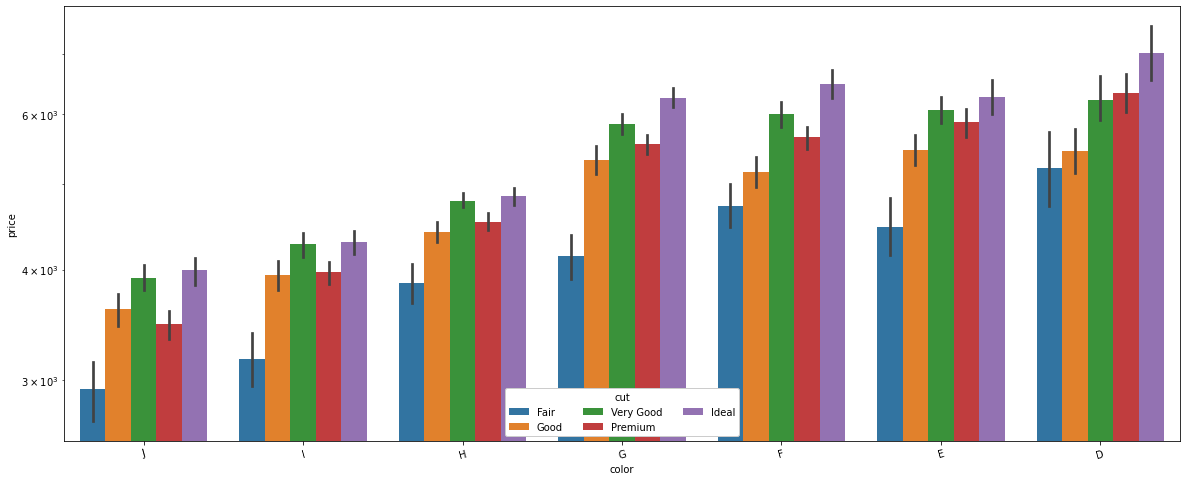

In [33]:
plt.figure(figsize=(20,8))
ax = sb.barplot(data = df, x = 'color', y = 'price', hue = 'cut')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cut')
plt.yscale('log');
plt.xticks(rotation=15);

A clustered bar chart could work, but considering that `price` should be on a log scale, there isn't really a nice baseline that would work well. And with the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a `violin plot`'s narrow areas; simplicity is better ;(


The clustered `box plot` or the clustered `point plot` might be the best choices in this case among many options.

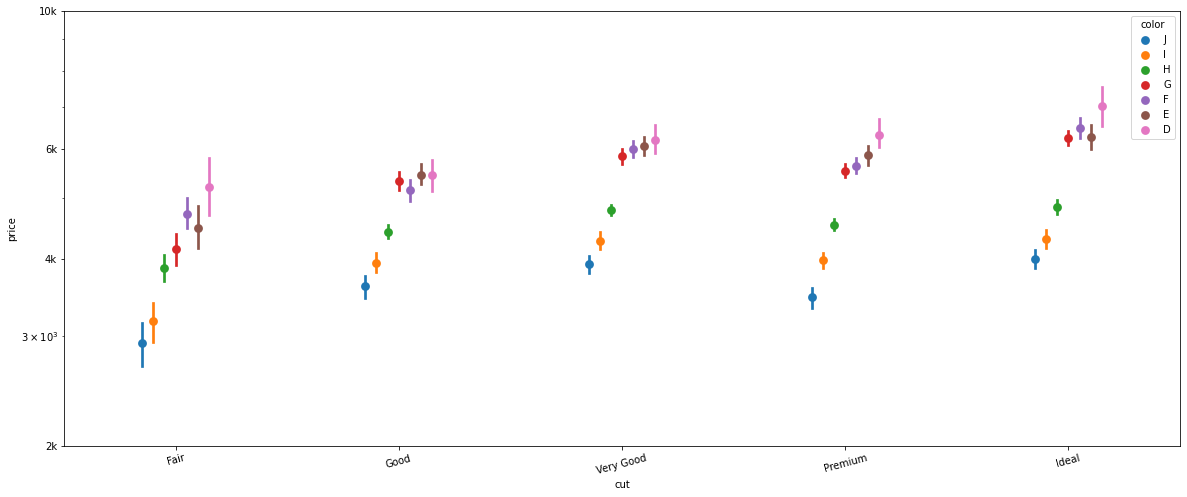

In [34]:
plt.figure(figsize=(20,8))
ax = sb.pointplot(data = df, x = 'cut', y = 'price', hue = 'color',
                  linestyles = "",dodge = 0.3)
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
plt.xticks(rotation=15);

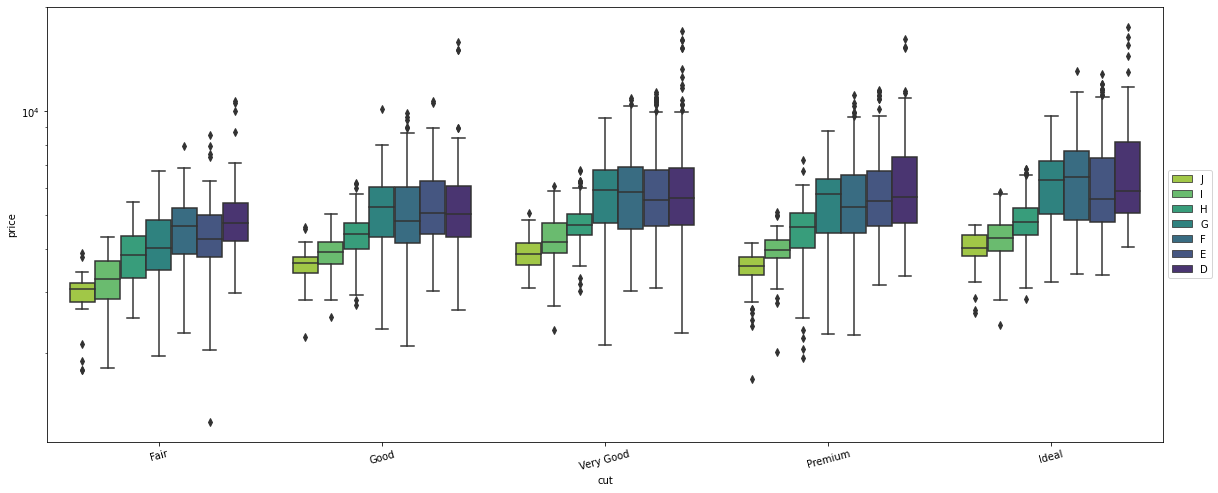

In [35]:
plt.figure(figsize=(20,8))
sb.boxplot(data = df,x = 'cut', y = 'price', hue = 'color',palette='viridis_r')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) 
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
plt.yscale('log')
plt.xticks(rotation = 15);

There is a gradual increase in `price` across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable.

# Explanatory Polishing
During that exploration, we found that the primary driver of `price` was `carat` weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The `price` was then modified by the diamond's `cut`, `colo`r, and `clarity` grades.

Now, I'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form. The first plot to polish depicts the base relationship between `price` and `carat`.

## Price VS Carat

Use the following checklist to make sure you've checked the major points of revision in this plot.
- <span style="color:white">Does the plot has an informative title?</span>
- <span style="color:white">Are the axis labels informative?</span>
- <span style="color:white">Are the tick values interpretable?</span> 
- <span style="color:white">Do we need to worry about any of the plot aesthetics?</span>

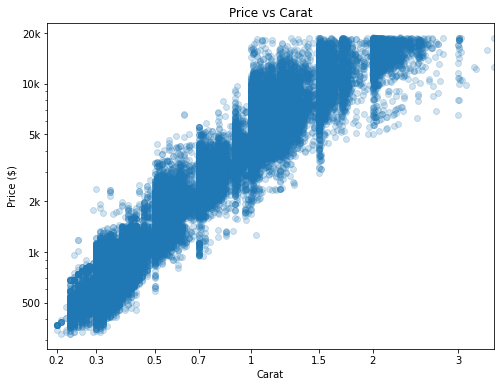

In [40]:
plt.figure(figsize = [8, 6])
plt.title('Price vs Carat')
plt.scatter(data = diamonds, x = 'cr_carat', y = 'price',alpha = 1/5)

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cuberoot_trans(.18), cuberoot_trans(3.5)])
plt.xlabel('Carat')

plt.show()

The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by **specifying the tick marks**.By taking the advantage of the 1-2-5-10 sequence to set which tick marks to show.

As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Note that we also need to make use of the `cuberoot_trans()` function since the transformation is non-standard. #Done but needs review

However, Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. 

There's a lot of overplotting in the scatterplot as given. We need to play with the `alpha` parameter to try and make the main trend stand out more

The second plot that we will polish is a multivariate plot of `price` against levels of `color` and `cut`, for diamonds of about 1 `carat` weight. 

## Price VS Cut VS Color

In [37]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

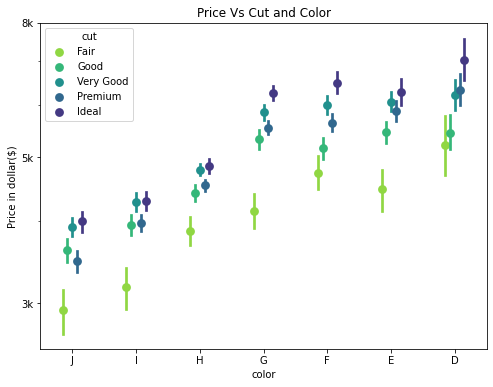

In [38]:
plt.figure(figsize = [8,6])

#parameters : dodge,color,line off
ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut'
                  ,dodge=0.3,palette='viridis_r',linestyles = "")

# axis ticks
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

#Add labels:
plt.title('Price Vs Cut and Color')
plt.ylabel('Price in dollar($)')
plt.show();